In [4]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [5]:
#ENTSOE Germany 110101

load_s = """51754.0800000005
49544.3199999952
47602.2400000002
46456.480000009
44713.7600000055
41500.4800000025
41523.9999999942
42217.2799999948
44829.1200000032
47887.8399999927
51251.2000000007
52524.6400000009
51830.2399999997
51267.9999999887
51163.8399999993
52942.3999999959
57564.6400000019
58424.7999999992
57504.1600000053
55480.3199999934
54737.7600000045
55400.8000000055
52606.4000000004
49222.8800000044"""

In [10]:
load = np.array([float(i) for i in load_s.split("\n")])/1e3

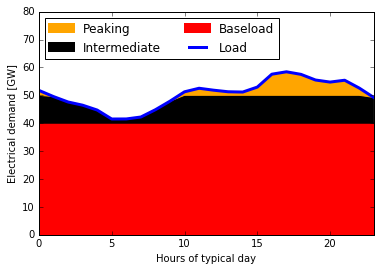

In [29]:
fig,ax = plt.subplots(1,1)

plt.plot(load,linewidth=3,label="Load")

ax.set_ylabel("Electrical demand [GW]")

bottom = np.zeros(len(load))

index = range(24)

cap = [40,10,50]

colors = ["red","black","orange"]

for i,source in enumerate(["Baseload","Intermediate","Peaking"]):
    dispatch = np.array([cap[i] if load[it] - bottom[it] > cap[i] else load[it] - bottom[it] for it in index])
    
    ax.fill_between(index,bottom,bottom+dispatch,color=colors[i],alpha=1)

    bottom+=dispatch
    
    ax.plot([], [], color=colors[i], linewidth=10,label=source,alpha=1)

handles, labels = ax.get_legend_handles_labels()

# reverse the order
ax.legend(handles[::-1], labels[::-1],loc="upper left",ncol=2)

ax.set_ylim([0,80])

ax.set_xlim([0,23])

ax.set_xlabel("Hours of typical day")

In [30]:
fig.tight_layout()

fig.savefig("baseload-peaking.pdf")